# Import Libraries

In [1]:
import os
import sys

util_path = os.path.abspath(os.path.join('..'))

if util_path not in sys.path:
    sys.path.append(util_path)

import utility_func as util
import importlib
importlib.reload(util)

<module 'utility_func' from 'D:\\GitUpload\\CMT-GSC-AI\\utility_func.py'>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
curr_dir = (os.getcwd()).replace('\\', '/')
curr_dir = os.path.abspath(os.path.join(curr_dir, '..'))
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = util.pd.read_csv(data_path+'/Amangal dataset/3 clusters/clst3_stream_sediments_gcs_ngdr_56L05.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,ho,er,tm,yb,lu,hf,ta,u,toposheet,cluster
0,105977,106160,56L01/168/S/15,78.25000,16.95782,61.41,16.620,4.65,0.700,1.850,...,1.243898,3.616776,0.651688,4.357227,0.780388,24.324602,2.000126,5.737075,56L01,2
1,105991,106174,56L01/182/S/15,78.25000,16.97590,66.05,14.380,3.89,0.710,0.950,...,0.754300,2.410600,0.380987,2.934133,0.413652,17.919039,0.846934,4.624359,56L01,3
2,106016,106199,56L5/001/S/15,78.25938,16.75904,60.30,16.210,3.46,0.630,0.780,...,0.754300,2.410600,0.380987,2.691000,0.403100,17.546000,0.970800,4.624359,56L05,3
3,106017,106200,56L5/002/S/15,78.27814,16.75904,60.36,13.840,2.88,0.550,1.130,...,0.800800,2.583900,0.412200,2.867500,0.465000,26.725200,0.990600,6.046900,56L05,3
4,106018,106201,56L5/003/S/15,78.29690,16.75904,62.64,13.285,3.99,0.702,2.349,...,2.316568,6.441239,1.086418,6.533689,1.013261,26.904191,2.270468,11.002010,56L05,1


In [6]:
str_elem = util.elem_list(str_sed_data)
str_elem_df = str_sed_data[str_elem]

In [7]:
str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,dy,ho,er,tm,yb,lu,hf,ta,u,cluster
0,61.41,16.620,4.65,0.700,1.850,0.870,0.060,0.980,3.560,0.090,...,6.836663,1.243898,3.616776,0.651688,4.357227,0.780388,24.324602,2.000126,5.737075,2
1,66.05,14.380,3.89,0.710,0.950,0.610,0.050,1.930,3.860,0.140,...,4.017100,0.754300,2.410600,0.380987,2.934133,0.413652,17.919039,0.846934,4.624359,3
2,60.30,16.210,3.46,0.630,0.780,0.840,1.050,3.540,0.040,0.100,...,4.017100,0.754300,2.410600,0.380987,2.691000,0.403100,17.546000,0.970800,4.624359,3
3,60.36,13.840,2.88,0.550,1.130,0.940,2.290,3.780,0.050,0.270,...,4.144400,0.800800,2.583900,0.412200,2.867500,0.465000,26.725200,0.990600,6.046900,3
4,62.64,13.285,3.99,0.702,2.349,1.889,0.068,0.759,3.047,0.168,...,13.104097,2.316568,6.441239,1.086418,6.533689,1.013261,26.904191,2.270468,11.002010,1


## Concentration of elements in each cluster

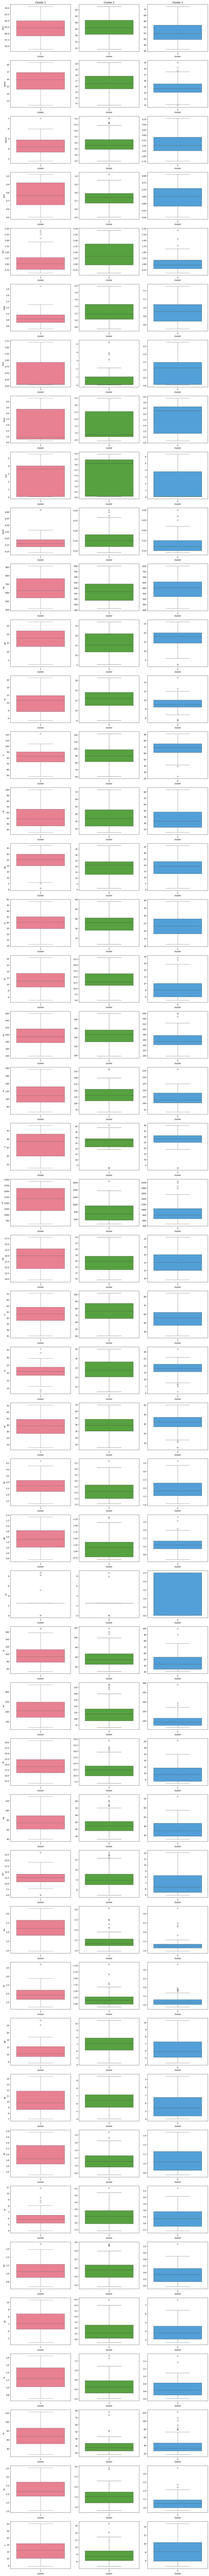

In [8]:
n_elem = len(str_elem_df.columns) - 1
n_clstr = len(str_elem_df['cluster'].unique())
# col_pal = ['#bfeeff', '#a8c5dd', '#a9a2b8', '#a58b91']
col_pal = util.sns.color_palette("husl", n_clstr)

fig, axes = util.plt.subplots(nrows=n_elem, 
                              ncols=n_clstr, 
                              figsize=(15, 4 * n_elem))

# If only one row or one column, axes need to be reshaped into a 2D array for consistency in indexing
if n_elem == 1:
    axes = util.np.expand_dims(axes, 
                               axis=0)
if n_clstr == 1:
    axes = util.np.expand_dims(axes, 
                               axis=1)

# Loop through each element
for i, element in enumerate(str_elem_df.columns[:-1]):  # assuming the last column is 'cluster'
    for cluster in range(1, n_clstr+1):
        # Filter data for the current cluster
        cluster_data = str_elem_df[str_elem_df['cluster'] == cluster]
        
        # Create boxplot for the current element in the current cluster subplot
        util.sns.boxplot(x='cluster', 
                         y=element, 
                         data=cluster_data, 
                         ax=axes[i, cluster-1], 
                         palette=[col_pal[cluster-1]])
        
        # Set titles and labels appropriately
        if i == 0:
            axes[i, cluster-1].set_title(f'Cluster {cluster}')
        if cluster == 1:
            axes[i, cluster-1].set_ylabel(element)
        else:
            axes[i, cluster-1].set_ylabel('')

# Adjust layout
util.plt.tight_layout()
util.plt.show()

## Heatmap for dominant elements among clusters

In [9]:
cluster_mean = str_elem_df.groupby('cluster')[str_elem].mean()
cluster_mean.drop(['cluster'], axis=1, inplace=True)

In [10]:
cluster_mean

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,gd,dy,ho,er,tm,yb,lu,hf,ta,u
cluster,,,,,,,,,,,,,,,,,,,,,
1,62.076414,15.763948,4.268552,0.776052,1.105931,0.853483,0.377655,1.688931,2.798448,0.171966,...,11.045475,10.273299,1.977308,6.142775,1.067830,7.380128,1.291147,69.892996,2.296833,12.647160
2,58.392123,16.509815,4.959677,0.739200,1.458154,1.244415,0.665031,1.411046,2.418246,0.158631,...,7.129095,6.377724,1.136402,3.459449,0.570926,3.762354,0.672718,29.732654,1.485165,7.867704
3,62.229034,14.802342,3.546603,0.643384,1.018219,0.906822,0.976822,2.708384,1.395397,0.135753,...,6.097766,5.686621,1.078403,3.415792,0.572232,3.931766,0.671039,41.036638,1.299417,8.081653


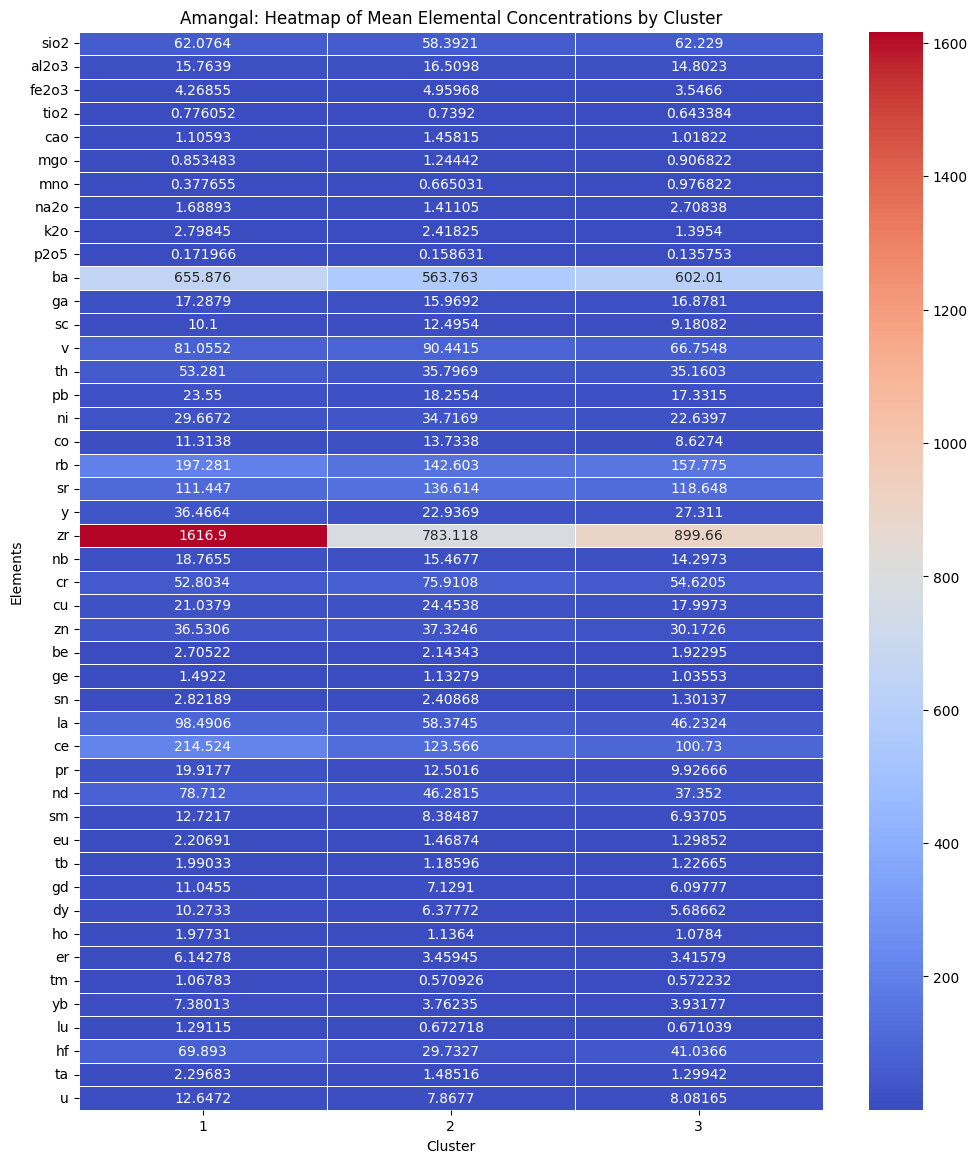

In [11]:
util.plt.figure(figsize=(12, 14))
heatmap = util.sns.heatmap(cluster_mean.T, 
                           annot=True, 
                           cmap='coolwarm', 
                           linewidths=.5, 
                           fmt='g')
heatmap.set_title('Amangal: Heatmap of Mean Elemental Concentrations by Cluster')
heatmap.set_xlabel('Cluster')
heatmap.set_ylabel('Elements')
util.plt.show()

- Dominant elements in each cluster before handling outliers

In [12]:
cluster_mean

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,gd,dy,ho,er,tm,yb,lu,hf,ta,u
cluster,,,,,,,,,,,,,,,,,,,,,
1,62.076414,15.763948,4.268552,0.776052,1.105931,0.853483,0.377655,1.688931,2.798448,0.171966,...,11.045475,10.273299,1.977308,6.142775,1.067830,7.380128,1.291147,69.892996,2.296833,12.647160
2,58.392123,16.509815,4.959677,0.739200,1.458154,1.244415,0.665031,1.411046,2.418246,0.158631,...,7.129095,6.377724,1.136402,3.459449,0.570926,3.762354,0.672718,29.732654,1.485165,7.867704
3,62.229034,14.802342,3.546603,0.643384,1.018219,0.906822,0.976822,2.708384,1.395397,0.135753,...,6.097766,5.686621,1.078403,3.415792,0.572232,3.931766,0.671039,41.036638,1.299417,8.081653


In [21]:
max_clstr = cluster_mean.idxmax()
dict = {
    'Element' : max_clstr.index.tolist(), 
    'Cluster' : max_clstr.values.tolist()
}
elem_clstr_df = util.pd.DataFrame(dict)
elem_clstr_df.head()

,Element,Cluster
0,sio2,3
1,al2o3,2
2,fe2o3,2
3,tio2,1
4,cao,2


In [12]:
elem_clstr_df = pd.DataFrame(columns=['clutser 1', 'clutser 2', 'clutser 3'])
elem_clstr_df.loc[0] = ['Vanadium', np.NaN, 'Strontium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Arsenic', np.NaN, 'Barium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Chromium', np.NaN, 'Zirconium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Nickel', np.NaN, 'Neodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gallium', np.NaN, 'Rubidium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Copper', np.NaN, 'Praseodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Zinc', np.NaN, 'Silver']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Scandium', np.NaN, 'Cerium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Cobalt', np.NaN, 'Thorium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gold', np.NaN, 'Lanthanum']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Mercury', np.NaN, 'Hafnium']

In [13]:
elem_clstr_df

,clutser 1,clutser 2,clutser 3
0,Vanadium,NaN,Strontium
1,Arsenic,NaN,Barium
2,Chromium,NaN,Zirconium
3,Nickel,NaN,Neodymium
4,Gallium,NaN,Rubidium
5,Copper,NaN,Praseodymium
6,Zinc,NaN,Silver
7,Scandium,NaN,Cerium
8,Cobalt,NaN,Thorium
9,Gold,NaN,Lanthanum


In [14]:
clstr1_elem_df = cluster_mean[cluster_mean.index == 0][['v', 'as_', 'cr', 'ni', 'ga', 'cu', 'zn', 'sc', 'co', 'au', 'hg']]
clstr2_elem_df = cluster_mean[cluster_mean.index == 2][['sr', 'ba', 'zr', 'nd', 'rb', 'pr', 'ag', 'ce', 'th', 'la', 'hf']]

In [15]:
clstr1_elem_df

,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg
cluster,,,,,,,,,,,
0,320.131818,20.060909,289.140909,92.231818,18.936364,65.654545,65.3,24.640909,36.727273,20.613636,16.772727


In [16]:
clstr2_elem_df

,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf
cluster,,,,,,,,,,,
2,388.29726,832.106849,842.473973,29.389561,85.875342,7.68695,55.246575,68.574088,19.539726,33.281071,28.702119


In [17]:
clstr1_df = str_sed_data[str_sed_data['cluster'] == 1][['gid', 'longitude', 'latitude'] + list(clstr1_elem_df.columns) + ['cluster']]
clstr1_df.reset_index(inplace=True, drop='index')
clstr1_df.head()

,gid,longitude,latitude,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg,cluster
0,3604,77.509259,14.259009,347.0,24.0,883.0,249.0,20.0,75.0,61.0,26.0,54.0,16.0,15.0,0
1,3605,77.527778,14.259009,500.0,26.0,317.0,105.0,20.0,74.0,92.0,26.0,46.0,20.0,11.0,0
2,3606,77.546296,14.259009,353.0,21.0,357.0,101.0,22.0,56.0,71.0,24.0,41.0,1.5,10.0,0
3,3689,77.509259,14.277027,479.0,24.0,315.0,104.0,26.0,92.0,83.0,29.0,51.0,1.5,35.0,0
4,3690,77.527778,14.277027,382.0,30.0,293.0,81.0,20.0,57.0,77.0,23.0,37.0,1.5,10.0,0


In [18]:
clstr2_df = str_sed_data[str_sed_data['cluster'] == 2][['gid', 'longitude', 'latitude'] + list(clstr2_elem_df.columns) + ['cluster']]
clstr2_df.reset_index(inplace=True, drop='index')
clstr2_df.head()

,gid,longitude,latitude,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf,cluster
0,2947,77.657407,14.475225,375.7,826.5,695.4,31.887143,74.2,8.555444,25,72.232300,16.6,37.722005,26.874492,2
1,2948,77.675926,14.475225,465.2,836.2,826.1,28.995136,73.3,7.586066,24,63.086789,17.0,31.134342,37.079419,2
2,2951,77.731481,14.475225,405.8,770.5,1001.3,25.004000,86.8,6.659000,23,56.014999,23.1,27.639000,26.705000,2
3,2956,77.564815,14.493242,283.4,772.2,453.7,23.953863,63.6,6.265094,137,56.112010,9.8,26.657001,22.014712,2
4,2957,77.583333,14.493242,238.3,591.5,425.9,24.316941,64.8,6.554683,34,60.067221,9.3,29.094922,16.354219,2


## Contour Maps

In [33]:
def plot_contour(df, element, title):

    min_lat_limit = min(df['latitude']) - 0.05
    max_lat_limit = max(df['latitude']) + 0.05
    min_long_limit = min(df['longitude']) - 0.05 
    max_long_limit = max(df['longitude']) + 0.05

    grid_x, grid_y = np.mgrid[
        min_long_limit:max_long_limit:100j,  # 100j specifies 100 points in grid
        min_lat_limit:max_lat_limit:100j
    ]

    # Grid interpolation
    grid_z = griddata(
        (df['longitude'], df['latitude']),
        df[element],
        (grid_x, grid_y),
        method='cubic'  # 'cubic' for smoother contour lines
    )

    cmap = LinearSegmentedColormap.from_list("green_to_red", ["green", "yellow", "red"])
    # Plotting
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(grid_x, 
                      grid_y, 
                      grid_z, 
                      levels=15, 
                      cmap=cmap)  # contour map
    
    plt.colorbar(cp)  # add colorbar
    plt.title(f'{title}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(df['longitude'], 
                df['latitude'], 
                color='blue', 
                label='Sample Points')  # data points
    plt.legend()

    # for i, (x, y) in enumerate(zip(df['longitude'], df['latitude'])):
    #     plt.text(x, y, str(i+1), color='black', fontsize=8)
    
    plt.show()

### Contour map for Gold

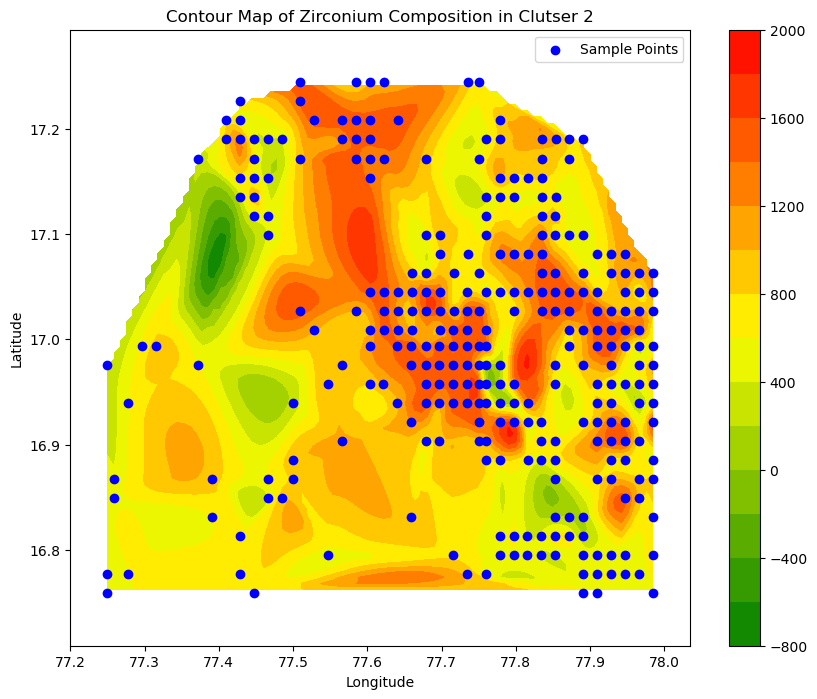

In [34]:
plot_contour(str_sed_data[str_sed_data['cluster'] == 2][['gid', 'longitude', 'latitude'] + ['zr'] + ['cluster']], 
             'zr', 
             'Contour Map of Zirconium Composition in Clutser 2')

## Gold concentration map

In [35]:
clstr1_df = str_sed_data[str_sed_data['cluster'] == 1]

In [45]:
# Plotting using Plotly
fig = px.scatter_mapbox(clstr1_df, lat='latitude', lon='longitude', color='au',
                        size='au', color_continuous_scale=px.colors.sequential.YlOrBr,
                        size_max=15, zoom=10,
                        hover_data={'latitude': False,  # Hide latitude in hover
                                    'longitude': False, # Hide longitude in hover
                                    'au': True,         # Show gold concentration
                                    'gid': True})       # Show sample ID

# Set mapbox style
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_zoom=4,
                  mapbox_center = {"lat": clstr1_df['latitude'].mean(), "lon": clstr1_df['longitude'].mean()})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show(renderer='browser')

In [57]:
def concentration_plot(df, elem, title, cb_title):
    # Define color for cluster 1 (you can adjust this as needed)
    color = ['#FFD700']  # Gold color for visualizing gold concentration
    
    marker_size = (df[elem] - df[elem].min()) / (df[elem].max() - df[elem].min()) * 15 + 5  # Ensures minimum size of 5
    
    # Create hover text for each point
    hover_text = [
        f'Latitude: {lat}<br>Longitude: {lon}<br>Sample ID: {gid}<br>Gold Concentration: {element} ppm' 
        for lat, lon, gid, element in zip(df['latitude'], 
                                          df['longitude'], 
                                          df['gid'],
                                          df[elem])
    ]
    
    # Create a trace for cluster 1
    trace = go.Scattermapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        mode='markers',
        marker=dict(
            size=marker_size,
            color=df[elem],  # Assign color based on gold concentration
            colorscale='YlOrBr',  # Yellow-Orange-Brown color scale
            colorbar_title=cb_title,
            showscale=True
        ),
        text=hover_text,
        hoverinfo='text'
    )
    
    # Setting map boundaries based on min and max latitude and longitude
    min_lat_limit = df['latitude'].min() - 1
    max_lat_limit = df['latitude'].max() + 1
    min_long_limit = df['longitude'].min() - 1
    max_long_limit = df['longitude'].max() + 1
    
    # Create layout for the map
    layout = go.Layout(
        title=title,
        hovermode='closest',
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=df['latitude'].mean(),
                lon=df['longitude'].mean()
            ),
            zoom=10,
            bounds=dict(
                south=min_lat_limit,
                north=max_lat_limit,
                west=min_long_limit,
                east=max_long_limit
            )
        ),
        autosize=True
    )
    
    # Create figure object and add trace and layout
    fig = go.Figure(data=[trace], 
                    layout=layout)
    
    fig.update_layout(
        autosize=False,
        width=1300,
        height=1000,
    )
    
    # Display the figure
    fig.show(renderer='browser')

In [63]:
concentration_plot(clstr1_df, 'au', 'Gold Concentration in Cluster 1', 'Gold<br>Concentration<br>(ppm)')

## Zirconium concentration map

In [59]:
clstr2_df = str_sed_data[str_sed_data['cluster'] == 2]

In [64]:
concentration_plot(clstr2_df, 'zr', 'Zirconium Concentration in Cluster 2', 'Zirconium<br>Concentration<br>(ppm)')

## Copper concentration map

In [65]:
concentration_plot(clstr1_df, 'cu', 'Copper Concentration in Cluster 1', 'Copper<br>Concentration<br>(ppm)')

## Lanthanum concentration map

In [66]:
concentration_plot(clstr2_df, 'la', 'Lanthanum Concentration in Cluster 2', 'Lanthanum<br>Concentration<br>(ppm)')